In [110]:
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline
import statsmodels.api as sm
import operator

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Task 1

Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it and figure out what it is due to.

In [4]:
#Loading data

mta = np.load('MTA_Fare.npy')
mta.shape #600 stations, 23 subway card types, 194 weeks

(600, 23, 194)

In [5]:
#Converting -1's to NaN

mta = mta.astype('float')
mta[mta == -1] = np.nan
mta[0]

array([[ 56961.,  64703.,  68002., ...,  36527.,  33929.,  36824.],
       [  1732.,   2083.,   2107., ...,   1264.,   1172.,   1238.],
       [   203.,    276.,    245., ...,    186.,    167.,    167.],
       ..., 
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [    nan,     nan,     nan, ...,   1121.,   1377.,    712.]])

In [6]:
#Since we are detecting an event, this should impact all subway card types. 
#I'm therefore aggregating all subway card types.
#I understand we're looking for an event that impacts most stations, so I'm not aggregating them.
#My goal is actually to find an event in which several stations were greatly impacted.

mta_typesum = np.nansum(mta, axis=1)
print mta_typesum.shape
print mta_typesum

(600, 194)
[[ 126878.  149477.  152383. ...,   78901.   74591.   76833.]
 [  37306.   46464.   49359. ...,       0.       0.       0.]
 [   6606.    6881.    7229. ...,    8171.    7907.    6790.]
 ..., 
 [      0.       0.       0. ...,       0.       0.       0.]
 [      0.       0.       0. ...,       0.       0.       0.]
 [      0.       0.       0. ...,       0.       0.       0.]]


In [7]:
#Creating lists with all means and std's per station
mta_means = np.zeros(600)
mta_std = np.zeros(600)

for i in range(600):
    mta_means[i] = mta_typesum[i].mean()
    mta_std[i] = mta_typesum[i].std()
    

In [8]:
#Creating list for outliers <(mean - 3 sigma) and counting the stations which experienced such abnormality
mta_outliers = np.zeros((600, 194))

for i in range(600):
    for d in range(194):
        if mta_typesum[i][d] < (mta_means[i]-3*mta_std[i]):
            mta_outliers[i][d] = 1
        else:
            mta_outliers[i][d] = 0
            
outliers_sum = mta_outliers.sum(axis=0)
outliers_sum

array([   2.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
          1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,   48.,   48.,    1.,    0.,    1.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    1.,    1.,    1.,
          1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    2.,    4.,    1.,    1.,    1.,    3.,    1.,    0.,
          2.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
          0.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    1.,    0.,    2.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    2.,    2.,    0.,    0.,    0.,    0.,    0.,
          0.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
        429.,   64.,

(0, 193)

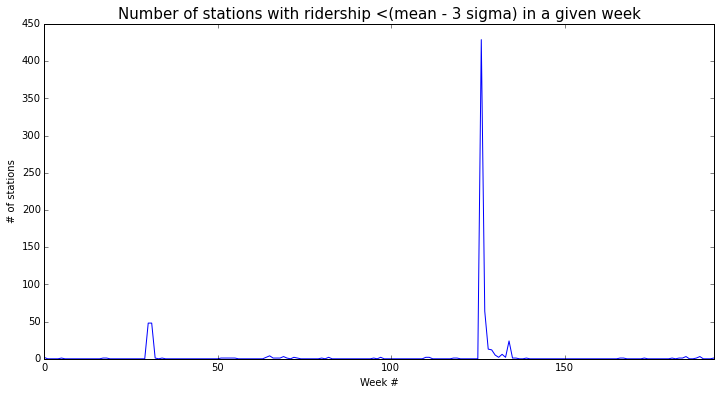

In [9]:
#Plotting the data
pl.figure(figsize=(12,6))

pl.plot(outliers_sum)
pl.title('Number of stations with ridership <(mean - 3 sigma) in a given week', fontsize = 15)
pl.ylabel('# of stations', fontsize = 10)
pl.xlabel('Week #', fontsize = 10)
xlim(0, 193)

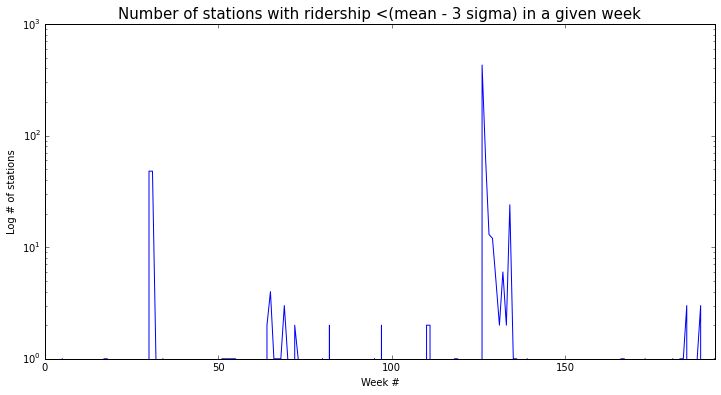

In [10]:
#Converting the y-axis to log scale for improved visualization
pl.figure(figsize=(12,6))

pl.plot(outliers_sum)
pl.title('Number of stations with ridership <(mean - 3 sigma) in a given week', fontsize = 15)
pl.ylabel('Log # of stations', fontsize = 10)
pl.xlabel('Week #', fontsize = 10)
xlim(0, 193)
pl.gca().set_yscale('log')

In [11]:
#Generating array with dates
dt = datetime.datetime(2010, 05, 21) 
end = datetime.datetime(2014, 02, 21)
step = datetime.timedelta(weeks=1)

weeks = []

while dt <= end:
    weeks.append(dt.strftime('%Y-%m-%d'))
    dt += step
    
weeks

['2010-05-21',
 '2010-05-28',
 '2010-06-04',
 '2010-06-11',
 '2010-06-18',
 '2010-06-25',
 '2010-07-02',
 '2010-07-09',
 '2010-07-16',
 '2010-07-23',
 '2010-07-30',
 '2010-08-06',
 '2010-08-13',
 '2010-08-20',
 '2010-08-27',
 '2010-09-03',
 '2010-09-10',
 '2010-09-17',
 '2010-09-24',
 '2010-10-01',
 '2010-10-08',
 '2010-10-15',
 '2010-10-22',
 '2010-10-29',
 '2010-11-05',
 '2010-11-12',
 '2010-11-19',
 '2010-11-26',
 '2010-12-03',
 '2010-12-10',
 '2010-12-17',
 '2010-12-24',
 '2010-12-31',
 '2011-01-07',
 '2011-01-14',
 '2011-01-21',
 '2011-01-28',
 '2011-02-04',
 '2011-02-11',
 '2011-02-18',
 '2011-02-25',
 '2011-03-04',
 '2011-03-11',
 '2011-03-18',
 '2011-03-25',
 '2011-04-01',
 '2011-04-08',
 '2011-04-15',
 '2011-04-22',
 '2011-04-29',
 '2011-05-06',
 '2011-05-13',
 '2011-05-20',
 '2011-05-27',
 '2011-06-03',
 '2011-06-10',
 '2011-06-17',
 '2011-06-24',
 '2011-07-01',
 '2011-07-08',
 '2011-07-15',
 '2011-07-22',
 '2011-07-29',
 '2011-08-05',
 '2011-08-12',
 '2011-08-19',
 '2011-08-

In [12]:
#Finding the week of the most prominent event
print weeks[np.argmax(mta_outliers)]

2012-10-26


#Analysis:

Hurricane Sandy hit NYC on October 29, 2012, which explains the plummet in subway ridership during the week of October 26.

#Task 2

Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [13]:
#I am now interested in visualizing data by subway card type
#I am therefore consolidating all the stations

mta_stationsum = np.nansum(mta, axis=0)
mta_stationsum.shape

(23, 194)

In [14]:
#Creating a dictionary for each ride type
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

cards = dict(zip(ridetype,mta_stationsum))

(0, 193)

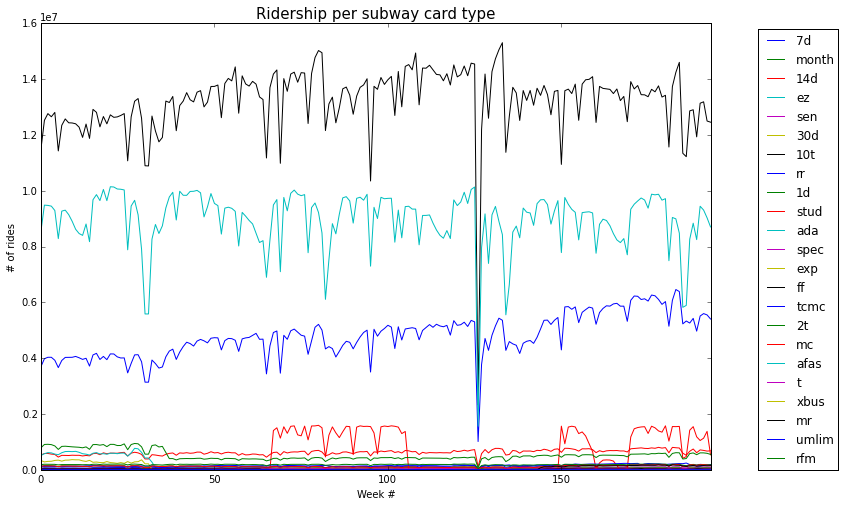

In [15]:
#Initial visualization of the data (not very informative)
pl.figure(figsize=(12,8))

for i in cards:
    pl.plot(cards[i])
    
pl.legend(cards.keys(), bbox_to_anchor=(1.2, 1))
pl.title('Ridership per subway card type', fontsize = 15)
pl.ylabel('# of rides', fontsize = 10)
pl.xlabel('Week #', fontsize = 10)
xlim(0, 193)

In [17]:
#Creating dictionary with rolling means
cards_rm = {}

for i in cards:
    cards_rm[i] = pd.rolling_mean(cards[i], 10)

cards_rm

{'10t': array([        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,  12347326.1,
         12438021.8,  12413400. ,  12328087.8,  12301901.5,  12208744.8,
         12357612. ,  12404151.5,  12375722.4,  12398252.2,  12395187.6,
         12427227.1,  12462523. ,  12536013.8,  12566822.9,  12655801.2,
         12471383.7,  12455257.1,  12547051.5,  12611487.5,  12631442.4,
         12449006.8,  12274765.4,  12277900.2,  12222242.4,  12120947.5,
         12204739.6,  12261287.9,  12256724.6,  12264300.1,  12219715.1,
         12435538. ,  12667972.8,  12751856.9,  12863806.3,  13006964.4,
         13169230.2,  13206527.8,  13190766.1,  13170398.7,  13328919.4,
         13397486.4,  13455056.1,  13365256.8,  13423695.2,  13507898.6,
         13548391.7,  13633541.2,  13610955.6,  13705084.4,  13714214.6,
         13715417.1,  13728577.5,  13848881.6,  13800651.5,  13724992.4,
         13448601.3,  13374427.2,  13514772.

In [18]:
#Calculating ratio of the flux near the beginning to the flux and near the end of the time series
print 'Ratio of avg last 10 weeks vs. avg first 10 weeks:'

for i in cards_rm:
    ratio = ((cards_rm[i][193]/cards_rm[i][9])-1)*100
    print '%s: %3.1f%%' % (i, ratio) 

Ratio of avg last 10 weeks vs. avg first 10 weeks:
7d: 39.0%
month: -42.1%
14d: 25.2%
ez: -100.0%
sen: 190.9%
30d: 3.4%
10t: 2.2%
rr: 159.3%
1d: 11.1%
stud: inf%
ada: -10.0%
spec: 6918.2%
exp: -100.0%
ff: -18.1%
tcmc: 53.2%
2t: -6.6%
mc: 21.4%
afas: -100.0%
t: 2.2%
xbus: 66.2%
mr: 2478393.1%
umlim: -19.1%
rfm: -35.0%


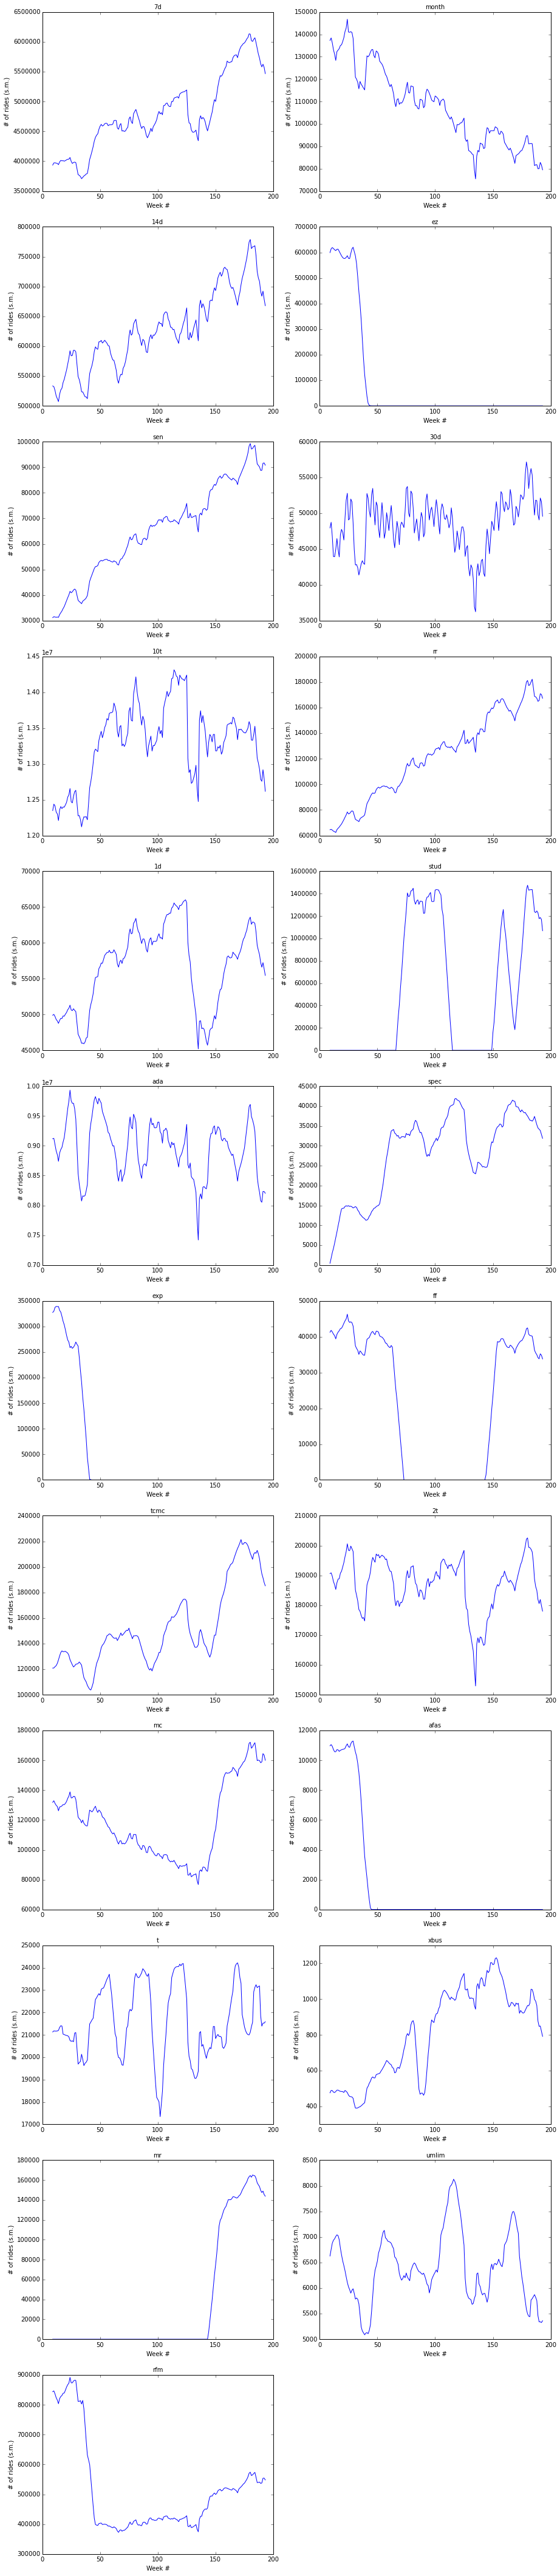

In [19]:
#Plotting stationary mean for all subway card types
fig = plt.figure(figsize(15,75))
plot_index = 0

for i in cards_rm:
    plot_index += 1
    fig.add_subplot(12, 2, plot_index)
    pl.plot(cards_rm[i])
    pl.title(i, fontsize = 10)
    pl.ylabel('# of rides (s.m.)', fontsize = 10)
    pl.xlabel('Week #', fontsize = 10)

#Analysis:

The analysis of the ratio of the avg rides in the last 10 weeks and the first 10 weeks, combined with the charts, allow us to affirm that the subway card types with the clearly steady increase in popularity were: senior (+190.1%) and railroad (+159.3%). Following the same logic, the only subway card type with a steady decrease in popularity was the monthly (-42.1%).

#Task 3

Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

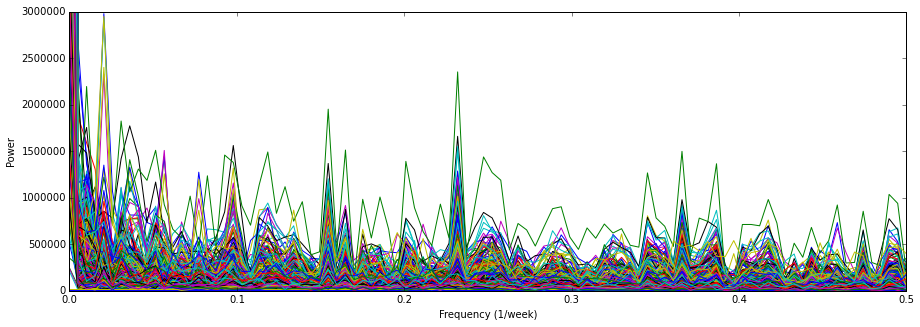

In [58]:
#We'll use mta_typesum as we're interested in the consolidate data for the stations
#We'll plot the data using Fourier transforms to identify periodicity

mta_fft = np.zeros((600, 98))
fig=pl.figure(figsize=(15,5))

N = 194
sample_rate = 1

for i in range(600):
    mta_fft[i] = np.abs(np.fft.rfft(mta_typesum[i]))
    ax = fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), mta_fft[i])
    ax.set_ylim(0, 3000000)
    ax.set_xlim(0, 0.5)
    ax.set_ylabel('Power', fontsize = 10)
    ax.set_xlabel('Frequency (1/week)', fontsize = 10)

##### 

In [66]:
#Visualizing the frequency array – the 1/52 point has a location closest to [4]
np.fft.rfftfreq(N, 1.0/sample_rate)

array([ 0.        ,  0.00515464,  0.01030928,  0.01546392,  0.02061856,
        0.0257732 ,  0.03092784,  0.03608247,  0.04123711,  0.04639175,
        0.05154639,  0.05670103,  0.06185567,  0.06701031,  0.07216495,
        0.07731959,  0.08247423,  0.08762887,  0.09278351,  0.09793814,
        0.10309278,  0.10824742,  0.11340206,  0.1185567 ,  0.12371134,
        0.12886598,  0.13402062,  0.13917526,  0.1443299 ,  0.14948454,
        0.15463918,  0.15979381,  0.16494845,  0.17010309,  0.17525773,
        0.18041237,  0.18556701,  0.19072165,  0.19587629,  0.20103093,
        0.20618557,  0.21134021,  0.21649485,  0.22164948,  0.22680412,
        0.23195876,  0.2371134 ,  0.24226804,  0.24742268,  0.25257732,
        0.25773196,  0.2628866 ,  0.26804124,  0.27319588,  0.27835052,
        0.28350515,  0.28865979,  0.29381443,  0.29896907,  0.30412371,
        0.30927835,  0.31443299,  0.31958763,  0.32474227,  0.32989691,
        0.33505155,  0.34020619,  0.34536082,  0.35051546,  0.35

In [79]:
#Creating a dictionary with the [4] element of each station's power series
#Ranking the dictionary and getting the keys/values of the highest observations
oneyear = {}

for i in range(600):
    oneyear[i] = mta_fft[i][4]
    
dict(sorted(oneyear.iteritems(), key=operator.itemgetter(1), reverse=True)[:4])

{0: 2980160.6355953491,
 150: 2931895.8769513383,
 194: 2950388.929214194,
 327: 2402218.5809588572}

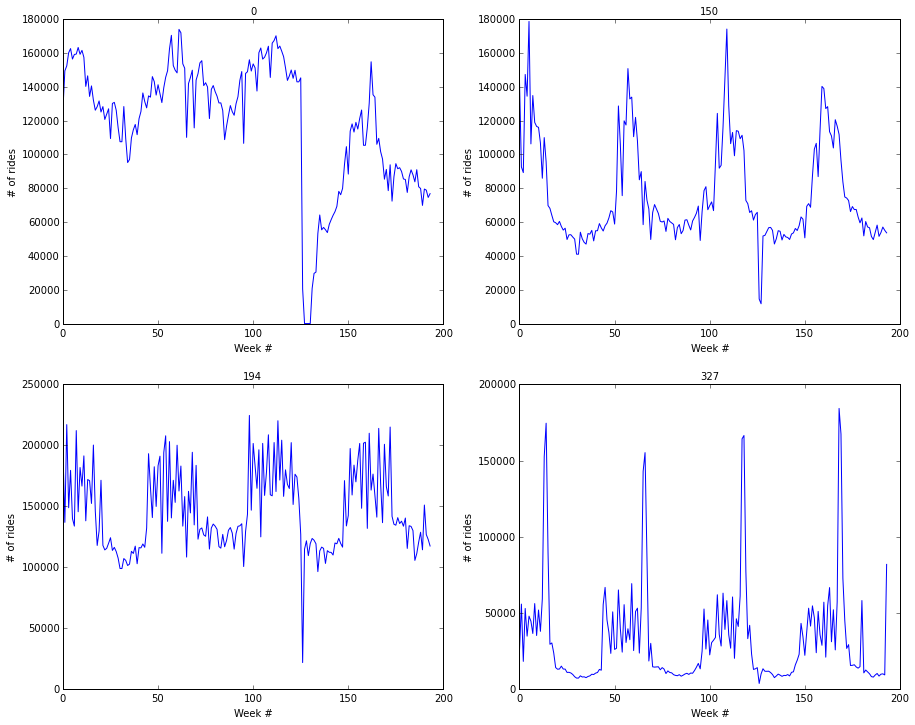

In [80]:
#Visualizing the series of the stations with the most prominent periodicity
fig = plt.figure(figsize(15,12))
plot_index = 0

peak_stations = [0, 150, 194, 327]

for i in peak_stations:
    plot_index += 1
    fig.add_subplot(2, 2, plot_index)
    pl.plot(mta_typesum[i])
    pl.title(i, fontsize = 10)
    pl.ylabel('# of rides', fontsize = 10)
    pl.xlabel('Week #', fontsize = 10)

In [129]:
#Checking the peak weeks for the stations most impacted by periodicity
station0 = mta_typesum[0].argsort()[-5:][::-1]
station150 = mta_typesum[150].argsort()[-5:][::-1]
station194 = mta_typesum[194].argsort()[-5:][::-1]
station327 = mta_typesum[327].argsort()[-5:][::-1]
station_peaks = np.sort(np.concatenate((station0, station150, station194, station327)))
print station_peaks

[  2   3   5  14  57  57  61  62  98 108 109 111 112 113 117 118 166 168
 169 172]


In [130]:
#Checking to what week that corresponds – Summer!
for i in station_peaks:
    print weeks[i]

2010-06-04
2010-06-11
2010-06-25
2010-08-27
2011-06-24
2011-06-24
2011-07-22
2011-07-29
2012-04-06
2012-06-15
2012-06-22
2012-07-06
2012-07-13
2012-07-20
2012-08-17
2012-08-24
2013-07-26
2013-08-09
2013-08-16
2013-09-06


#Analysis:

Stations 0, 150, 194 and 327 have the most prominent periodicity. As shown above, ridership at these stations tend to be particularly impacted by the summer months.